# k-Nearest Neighbors

The following code performs nested cross-validation and the k-nearest neighbour algorithm, estimate newdist between data samples, build confusion matrices and calculate performance metrics.

The purpose of this project is to:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

----


In [1]:
import pandas as pd #dataframe
import seaborn as sns # visualisation

# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets # import datasets
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plots

# set the seed for the random number generator
mySeed=1234567
np.random.seed(mySeed)

# load data
iris = datasets.load_iris() # load data 
X = iris.data # get features
y = iris.target # get targets
#print(iris.DESCR) # print dataset description

## 1. Exploratory Data Analysis

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at-hand. The code below loads the iris dataset for you. With only 4 features (sepal length, sepal width, petal length, and petal width), and 3 classes, it is possible to use scatter plots to visualise interactions between different pairings of features. An example of how this visualisation might look is shown below:

----

In [2]:
#plotting the interaction between the features
def myplotGrid(X,y):
    
    fig = plt.figure(figsize=(12,12))
    X = pd.DataFrame(X)
    #columns names
    X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    X['y'] = y
    # checking the correlation of the variables
    sns.pairplot(X, hue='y', vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])   
    plt.show()

<Figure size 864x864 with 0 Axes>

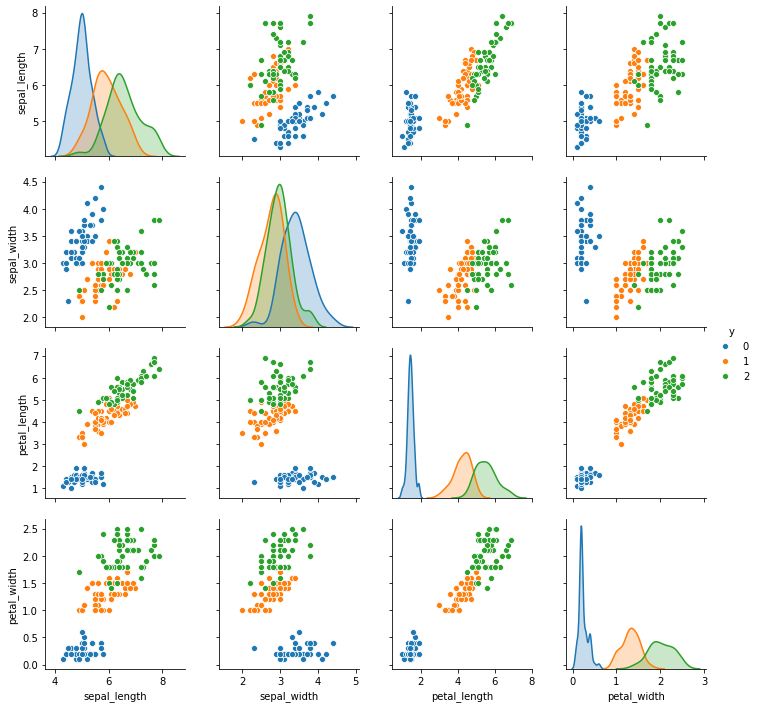

In [3]:
# visualising myplotGrid function
myplotGrid(X,y) 

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)
    
-----


<Figure size 864x864 with 0 Axes>

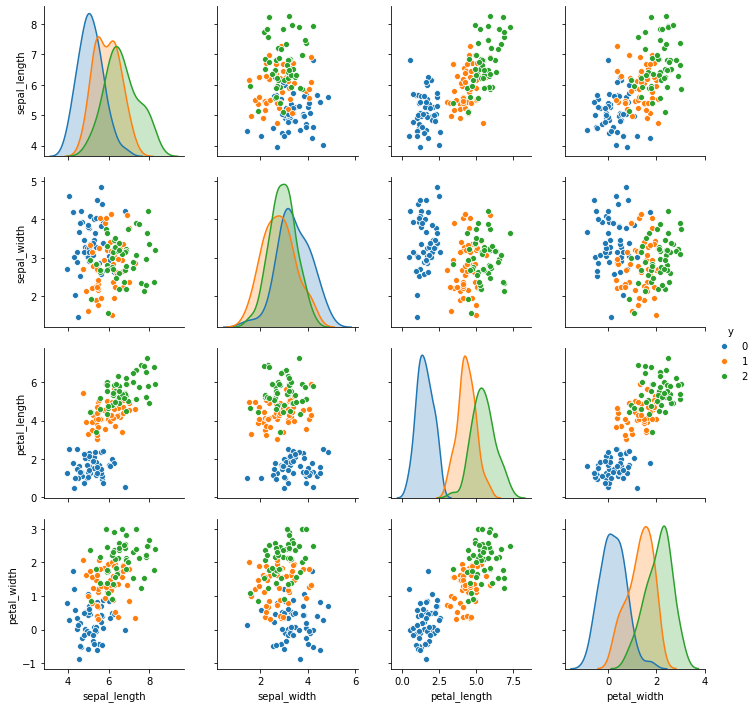

In [4]:
# noise data to make the classification more challenging
XN=X+np.random.normal(0,0.5,X.shape)
myplotGrid(XN, y)

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide -- and as a way of verifying your results -- but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = getNeighbours(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your pred outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement a separate function for calculating the newdist between two vectors, znd another function that uncovers the nearest neighbour(s) to a given vector. 

----

In [5]:
#splits our data into two sets (a training and testing set)
#split : 80% train and 20% test
train_index = int(0.8 * len(X))
X_train, X_test = X[:train_index], X[train_index:] 
y_train, y_test = y[:train_index], y[train_index:]

print("X_train: " ,X_train.shape, "\n")
print("y_train: " ,y_train.shape, "\n")
print("X_test: " ,X_test.shape, "\n")
print("y_test: " ,y_test.shape)

X_train:  (120, 4) 

y_train:  (120,) 

X_test:  (30, 4) 

y_test:  (30,)


In [6]:
#this function returns the distance between two vectors
def euclideanDistance(in1, in2):
    # in1, in2 = data points
    return np.linalg.norm(in1-in2, axis=0)


def manhattanDistance(in1, in2):
    # in1, in2 = data points
    dist = 0
    for j in range(len(in1)):
        dist = dist + abs(in1[j]-in2[j])
    return dist;


def minkowskiDistance(in1, in2, q):
      # in1, in2, q = data points
    dist = 0
    for j in range(len(in1)):
        dist = dist + abs(in1[j]-in2[j])**q
    dist = np.sqrt(dist)**(1/q)
    return dist;

In [7]:
#It calculates the distance between a point and all points in the dataset. 
#Then, it takes the k nearest points and count the labels. Finally, it returns the label that has the maximum count.

# kNN Function
def getNeighbours(X, y, x_, k, option='euclidian'):

    predict=[]  
    # Calculating distances for our test point
    for j in x_:
        neighbours=[[],[]]
        if option=="manhattan":
            newoption = [manhattanDistance(j, i) for i in X_train]
        elif option=="euclidean":
            newoption = [euclideanDistance(j, i) for i in X_train]
        elif option=="minkowski":
            newoption = [minkowskiDistance(j, i, q=3) for i in X_train]   
         # finding the closest k neighbors
        # sorting index
        k_ids = np.argsort(newoption)[:k]
        # Getting k indices labes
        k_labels = [y_train[n] for n in k_ids]
        # count neighbor labels and take the label which has max count
        labels_counts = np.bincount(k_labels)
        predict.append(np.argmax(labels_counts))
    return np.array(predict)


# returns the predicted values
y_ = getNeighbours(X_train, y_train, X_test, k = 5, option= "euclidean" )

def calculateAccuracy(y_test,Y_pred):
    #retuns the accuracy
    accuracy = len(y_test[np.where(y_test==Y_pred)])/len(Y_pred) 
    return accuracy


print("predicted values: ", y_ , "\n")

print("Target values:", y_test, "\n")

print("accuracy:", calculateAccuracy(y_test, y_))


predicted values:  [2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1] 

Target values: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

accuracy: 0.8


## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. Within this you should write code that evaluates classifier performance. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold, best_param_fold = nestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan', 'minkowski'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan', 'minkowski']`` evaluates the two newdist on the validation sets.  mySeed is simply a random seed to enable us to replicate your results. The outputs could be a list of accuracy values, one per fold, and a list of the corresponding parameter tuples ``(distance, k)`` used to calculate these.

**Notes:** 
- use p=3 in minkowski distance.
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should implement/validate **at least** three distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold, and a list of the corresponding parameters
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)

----

In [8]:

def confusionMatrix(y_test,y_target,num_classes):

    n = np.zeros((num_classes,num_classes),dtype=np.int)

    for j in range(0, len(y_target)):
        n[y_test[j]][y_target[j]] +=1
    #loops through the results and updates the matrix appropriately
    return n

# nested cross validation function
def nestedCrossVal(X,y,fold_K,nNeighbours,dists_options,mySeed):
    
    '''    
    X = data / features
    y = outputs
    fold_K = number of folds
    nNeighbours = list of number of neighbours parameter for validation
    dists_options = list of distances for validation
    mySeed = random seed
    '''

    acc_fold=[]
    param_fold=[]
    c_matrices=[]
    #
    r=list(range(X.shape[0]))
    indices = np.random.permutation(r)

    #splitting the indices to fold_K different bins
    bins=np.array_split(indices, fold_K)
    
    assert(fold_K==len(bins))
    
    #goes through the k folds
    for n in range(0,fold_K):
        f_Train=[]  # saves training current indices 
        f_Test=[]  # saves test current indices
        f_Val=[]    # saves validation current indices
        
        #loop through the bins : validation, testing and training
        vaidationl_Bin = (n+1)%fold_K
        for i in range(0,len(bins)):
            if (n == i):
                f_Test = bins[n]
            elif (i == vaidationl_Bin):
                f_Val = bins[vaidationl_Bin]
            else:
                f_Train.extend(bins[i])


        bestDistMetric='' #saves the best distance metric 
        bestNeightbours=-1 #saves the best number of neighbours 
        best_Acc=-10 #save the best validation accuracy here

        # loops through the paramenters : distance and nearest neighbour
        for i in dists_options:
            for n in nNeighbours:
                y_target=getNeighbours(X[f_Train],y[f_Train],X[f_Val],n,i)
                accuracies = calculateAccuracy(y[f_Val], y_target)
                if accuracies > best_Acc:
                    bestDistMetric = i
                    bestNeightbours = n
                    best_Acc = accuracies
    

        #using KNN on train data and test data
        f_Train.extend(f_Val)
        # getting the nearest neighbour on folds
        y_=getNeighbours(X[f_Train],y[f_Train], X[f_Test], bestNeightbours,bestDistMetric)
        # appending the accuracy to an array
        accuracy_v =calculateAccuracy(y[f_Test],y_)
        acc_fold.append(accuracies)
        #saves the parameters
        param_fold.append((bestDistMetric, bestNeightbours))
        # collets the number of classes
        num_classes = len(np.unique(y_))
        # saves the confusin matrix
        conf_matrix=confusionMatrix(y[f_Test],y_,num_classes)
        c_matrices.append(conf_matrix)
        
    return acc_fold, param_fold, np.array(c_matrices);


dists_options=["euclidean", "manhattan","minkowski"]

kFolds=5
# calling the nested crossvalidation function
accuracies_fold, bestParameter, c_matrices = nestedCrossVal(X,y,kFolds , list(range(1,11)),dists_options,mySeed)

#  calculating the average accuracy
averageAccuracy = np.average(accuracies_fold)

# calculating the standar diviation of accuracy
standardDeviation = np.std(accuracies_fold)

#results
print("Accuracy: ", accuracies_fold ,"\n")
print("Distance and K :" ,bestParameter, "\n")
print("Average Accuracy:", averageAccuracy , "\n")
print("Standard Deviasion:", standardDeviation, "\n")

Accuracy:  [1.0, 0.9, 0.8666666666666667, 0.9, 0.9666666666666667] 

Distance and K : [('euclidean', 1), ('manhattan', 5), ('euclidean', 1), ('euclidean', 1), ('euclidean', 1)] 

Average Accuracy: 0.9266666666666665 

Standard Deviasion: 0.04898979485566354 



In [9]:

# calling the nested crossvalidation function on noisy data.
noiseyAccuracies_fold, noiseyBestParameters, noiseyConfMatrices = nestedCrossVal(XN,y,kFolds,list(range(1,11)),dists_options,mySeed)
noisey_avg_accuracy = np.average(noiseyAccuracies_fold)
# calculating the standar diviation of accuracy
standar_d = np.std(noiseyAccuracies_fold)

#results
print(" Noisy accuracy: ", noiseyAccuracies_fold, "\n")
print("Distance and K :" ,noiseyBestParameters,"\n" )
print("Noisy Average Accuracy:", noisey_avg_accuracy, "\n")
print("Noisy Standard Deviation:", standar_d)


 Noisy accuracy:  [0.9666666666666667, 0.8, 0.9, 0.8, 0.9333333333333333] 

Distance and K : [('euclidean', 8), ('euclidean', 1), ('manhattan', 1), ('euclidean', 1), ('euclidean', 2)] 

Noisy Average Accuracy: 0.8800000000000001 

Noisy Standard Deviation: 0.06863753427324665


### 3.2. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 1.00  |  1 |euclidean|
| 2 | 0.90  |  5 |manhattan|
| 3 | 0.86  |  1 |euclidean|
| 4 | 0.90  |  1 |euclidean|
| 5 | 0.96  |  1 |euclidean|
| **total** | 0.92 $\pm$ 0.048 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.96  |  2 |minkowski|
| 2 | 0.08  |  2 |euclidean|
| 3 | 0.90  |  3 |euclidean|
| 4 | 0.80  |  8 |euclidean|
| 5 | 0.93  |  4 |manhattan|
| **total** | 0.88 $\pm$ 0.068 |   |    |




### 3.3. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your code above to also return a list of confusion matrices (one for each fold),
 e.g.
 
    accuracies_fold, best_param_fold, confusion_matrix_fold = nestedCrossValConf(X,y,5,list(range(1,11)),['euclidean','manhattan', 'minkowski'],mySeed)

Then write a function to print the two matrices below. Make sure you label the matrix so that it is readable. You might also show class-relative precision and recall. 

----

In [10]:
def confusionMatrix(y_test,y_target,num_classes):

    n = np.zeros((num_classes,num_classes),dtype=np.int)

    for j in range(0, len(y_target)):
        n[y_test[j]][y_target[j]] +=1
    #loops through the results and updates the matrix appropriately
    return n

## 4. Questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in new Markdown cells below each question.

### Q1. Choice of parameters
Do the best parameters change per fold? Is there one parameter choice that is best regardless of the data used?

Answer:  Best paramenters and distance change per fold. The most popular paramenter is k =1 and distance is euclidean.

### Q2.	 Clean vs. noisy
Does the best parameter choice change depending on whether we use clean or noisy data? (Answer for both distance function and number of neighbours.)

Answer: yes, The best paramenert choice changes inorder to avoid overfitting and decrease the error rate.


### Q3. Exploratory data analysis
Looking again at the exploratory data analysis, what do you observe by plotting the figure for data without noise? What do you observe when you add Gaussian noise and plot again? 

Answer: The noise data are not distinctly seperated. The clean data shows a clear seperation of the lables.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

### Q5.	Improving performance on noisy data. 
The performance of k-NN on the noisy data should be worse than on the clean data. Suggest at least one way of improving the performance on the noisy data. Try to elaborate on your idea as much as possible, including pseudocode where possible.

Answer:Try with a higher value of K (7 or 9). A higher value of K would give you more supportive evidence about the class label of a point.